### Principal Component Analysis(PCA)
### and
### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [1]:
### Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
dataset = pd.read_csv("wine.csv")
dataset.head() 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
for i in dataset.columns:
    print(dataset[i].value_counts())

Type
2    71
1    59
3    48
Name: count, dtype: int64
Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64
Malic
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64
Ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64
Alcalinity
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 63, dtype: int64
Magnesium
88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118     3
104     3
100     3
110     3
116     3


In [4]:
# type shows number of clusters in dataset. drop it.

In [5]:
dataset.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


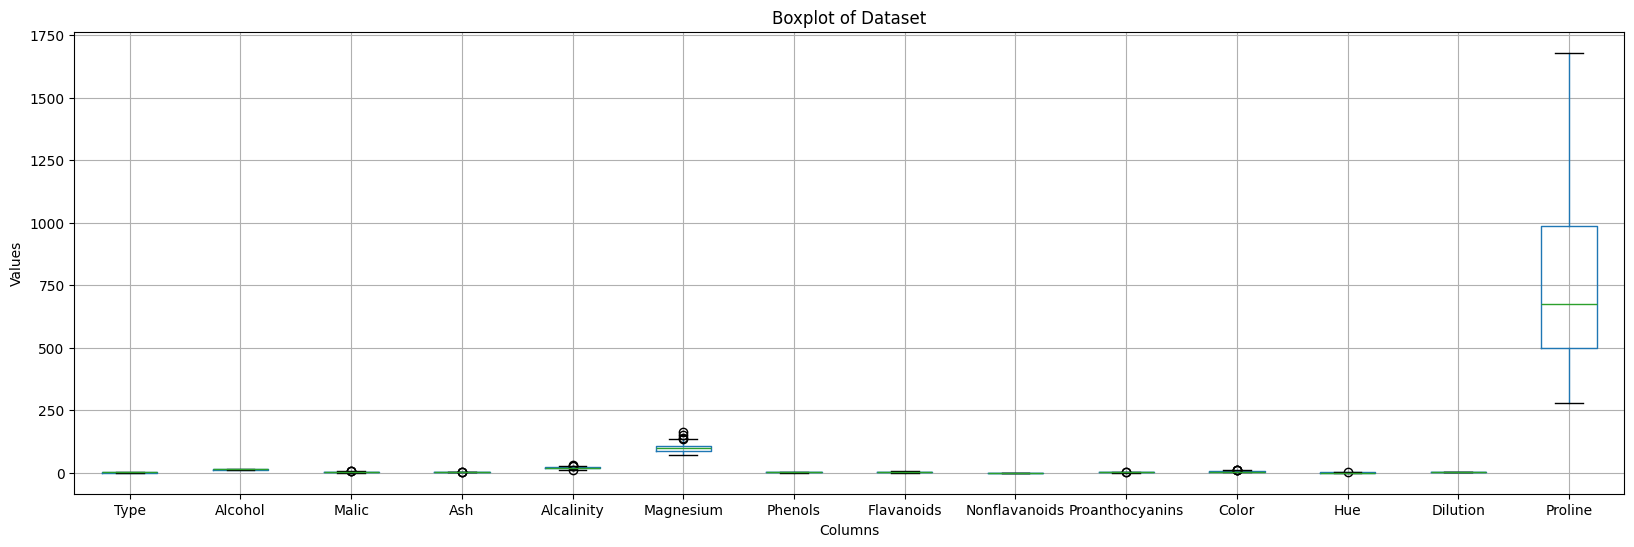

In [7]:
# Set figure size
plt.figure(figsize=(20, 6))

# Create a boxplot
dataset.boxplot()

# Add labels and title (optional)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of Dataset')

# Show the plot
plt.show()

In [8]:
# Feature Aanalysis

# drop first column 'type' which shows number of clusters. Remaining featires are used to perform PCA. 
# features are numeric. dummy variables are not required. perform standarization on all columns. 

In [9]:
# standardization
from sklearn.preprocessing import StandardScaler
#For K-Means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:,1:]) 
#first column is type which is already categorised and not useful for unsupervised clustering
scaled_data[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [10]:
# PCA

In [11]:
# for K-Means

In [12]:
# We need top 3 PCA values
# Standardized values will be used for K-Means
from sklearn.decomposition import PCA

pca_arr = PCA(n_components = 3)
pca_std_arr = pca_arr.fit_transform(scaled_data)
pca_std_arr[:5] #These are arrays

array([[ 3.31675081, -1.44346263, -0.16573904],
       [ 2.20946492,  0.33339289, -2.02645737],
       [ 2.51674015, -1.0311513 ,  0.98281867],
       [ 3.75706561, -2.75637191, -0.17619184],
       [ 1.00890849, -0.86983082,  2.02668822]])

In [13]:
var1 =pca_arr.explained_variance_ratio_
var1 #The first 3 PCA scores roughly explain only 69% of the data

array([0.36198848, 0.1920749 , 0.11123631])

In [14]:
var2 = np.cumsum(np.round(var1,decimals = 6)*100)
var2

array([36.1988, 55.4063, 66.5299])

In [15]:
# make dataset for K-Means - PCA Clustering

In [16]:
pca_std_df = pd.DataFrame(pca_std_arr)
pca_std_df.head() #We have made a seperate dataset for PCA KMeans Clustering

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [17]:
# For Agglomeratiive


In [18]:
## Normalised will be used for Agglo Clustering

from sklearn.preprocessing import MinMaxScaler

#For Heirarchial Agglo

array = dataset.iloc[:,1:]  #first column is type which is already categorised and not useful for unsupervised clustering

norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)

normscaled[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

In [19]:
pca_norm_arr = pca_arr.fit_transform(normscaled)
pca_norm_arr[:5]

array([[-0.70633576, -0.25319275,  0.02409269],
       [-0.4849768 , -0.00882289, -0.28048205],
       [-0.52117227, -0.18918722,  0.19621674],
       [-0.82164366, -0.58090551,  0.08110972],
       [-0.20254638, -0.05946657,  0.30023994]])

In [20]:
var1 =pca_arr.explained_variance_ratio_
var1

array([0.40749485, 0.18970352, 0.08561671])

In [21]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([40.75, 59.72, 68.28])

In [22]:
# making dataset for Agglomerative - PCA Clustering

In [23]:
pca_norm_df = pd.DataFrame(pca_norm_arr)
pca_norm_df.head() #We have made a seperate dataset for PCA KMeans Clustering

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [24]:
# K-Means Clustering - PCA

# find optimum number of clusters of K-Means - PCA dataset

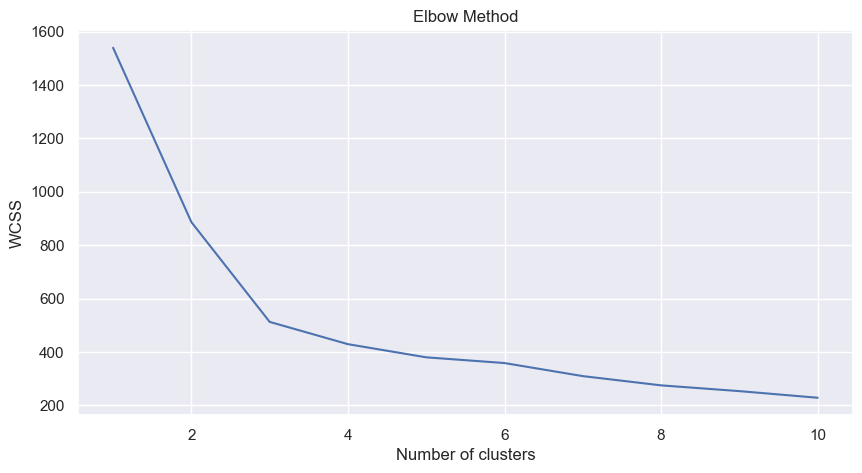

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Number of clusters(optimum) = 3

In [26]:
# building clustering algorithm

In [27]:
clusters_kmeans_pca = KMeans(3, random_state=50)
clusters_kmeans_pca.fit(pca_std_df)

KMeans(n_clusters=3, random_state=50)

In [28]:
# get cluster labels
clusters_kmeans_pca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [29]:
#Assigning clusters to the datset

data_kmeans_pca = pca_std_df.copy()
data_kmeans_pca['clusters_kmeans'] = clusters_kmeans_pca.labels_

In [30]:
clusters_kmeans_pca.cluster_centers_

array([[-0.23104063,  1.82134758,  0.24360512],
       [ 2.24048853, -0.73604842, -0.03204334],
       [-2.72003575, -1.12565126, -0.23909324]])

In [31]:
# model evaluation and t_SNE visualization

In [32]:
data_kmeans_pca.groupby('clusters_kmeans').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_kmeans,,,
0,-0.231041,1.821348,0.243605
1,2.240489,-0.736048,-0.032043
2,-2.720036,-1.125651,-0.239093


In [33]:
data_kmeans_pca['clusters_kmeans'].value_counts()

clusters_kmeans
1    68
0    59
2    51
Name: count, dtype: int64

In [34]:
data_kmeans_pca.head()

,0,1,2,clusters_kmeans
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


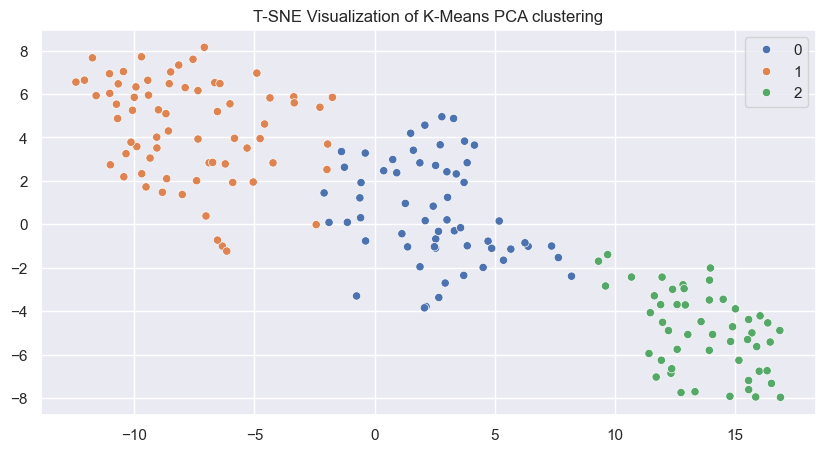

In [35]:
from sklearn.manifold import TSNE

# Use a more descriptive variable name for the transformed data
tsne_data = TSNE(n_components=2).fit_transform(data_kmeans_pca.iloc[:, :-1])

# Create the scatterplot using seaborn
sns.scatterplot(
    x=tsne_data[:, 0],  # First dimension from t-SNE
    y=tsne_data[:, 1],  # Second dimension from t-SNE
    hue=clusters_kmeans_pca.labels_,  # Color points by cluster labels
    palette="deep",  # Use a deep color palette
)

# Set a title for the plot
plt.title('T-SNE Visualization of K-Means PCA clustering')

# Show the plot
plt.show()

In [36]:
# K-Means Clustering - Original dataset

In [37]:
# find optimal number of clusters

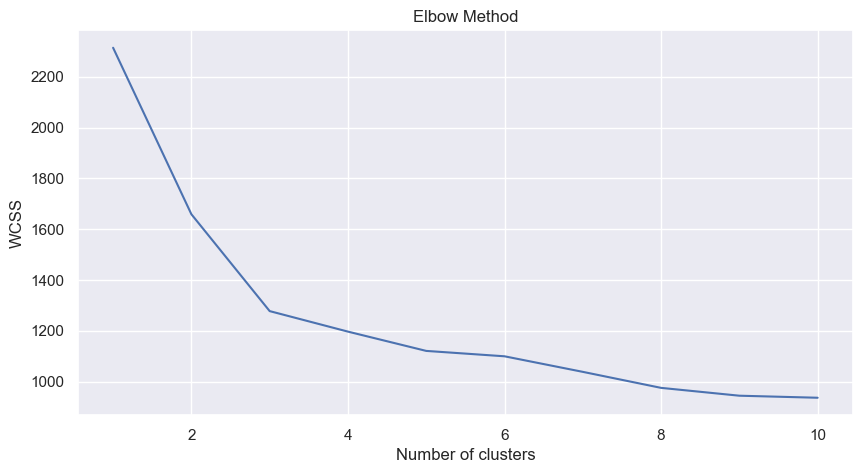

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Optimal number of Clusters is 3 in this case too

In [39]:
# building clustering algorithm

In [40]:
clusters_kmeans = KMeans(3, random_state=50)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=50)

In [41]:
clusters_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
#Assign clusters to the data set
data_kmeans = dataset.iloc[:,1:].copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [43]:
clusters_kmeans.cluster_centers_

array([[-0.93737314, -0.32697518, -0.49901564,  0.15553544, -0.60924515,
        -0.15886255, -0.02889998,  0.09163235, -0.06628898, -0.89682622,
         0.40081416,  0.21791499, -0.80888103],
       [ 0.73099285, -0.35927074,  0.27951742, -0.57081594,  0.60081095,
         0.86998166,  0.93082599, -0.60905149,  0.6095625 ,  0.10696731,
         0.5003457 ,  0.75021961,  1.02645985],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461]])

In [44]:
# Model Evaluation & PCA Reduction Visualisation

In [45]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_kmeans,,,,,,,,,,,,,
0,12.241774,1.972097,2.230000,20.012903,91.064516,2.195968,2.000484,0.373226,1.553065,2.984839,1.048806,2.765968,492.887097
1,13.592388,1.936119,2.442985,17.594030,108.298507,2.838060,2.956418,0.286269,1.938806,5.305373,1.071493,3.142836,1069.223881
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [46]:
data_kmeans['clusters_kmeans'].value_counts()

clusters_kmeans
1    67
0    62
2    49
Name: count, dtype: int64

In [47]:
data_kmeans.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [48]:
#Visualising the data via dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

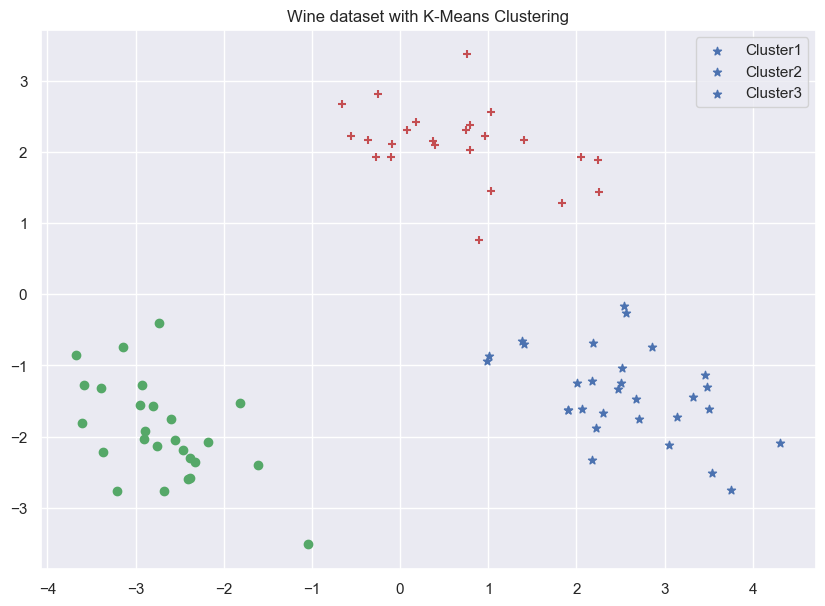

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')

plt.legend(['Cluster1', 'Cluster2', 'Cluster3'])
plt.title('Wine dataset with K-Means Clustering')
plt.show() 

In [50]:
# Heirarchial Agglomerative Clustering - PCA

In [51]:
# Identifying the hyperparameters
# number of clusters =3

In [52]:
# making a dendrogram

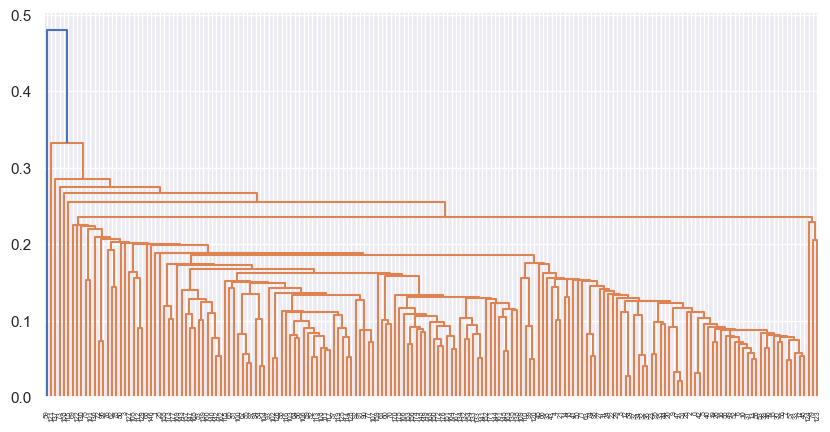

In [53]:
import scipy.cluster.hierarchy as sch
#dentogram linkage takes too much time to process. Not adivasable
dendrogram = sch.dendrogram(sch.linkage(pca_norm_df, method='single'))

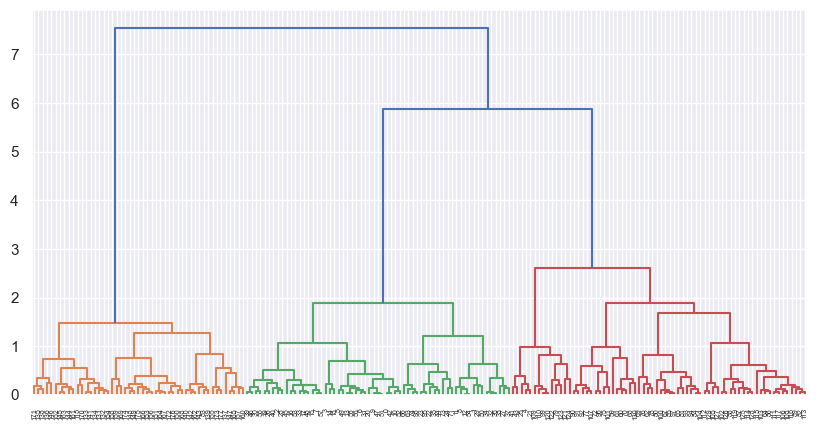

In [54]:
dendrogram = sch.dendrogram(sch.linkage(pca_norm_df, method='ward'))

In [55]:
# Building Agglomerative clustering model

In [56]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
agglo_pca = hc.fit_predict(pca_norm_df)

In [57]:
agglo_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
data_agglo_pca = pca_norm_df.copy()
data_agglo_pca['clusters_agglo'] = agglo_pca
data_agglo_pca.head()

,0,1,2,clusters_agglo
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1


In [59]:
data_agglo_pca.clusters_agglo.value_counts()

clusters_agglo
0    107
1     62
2      9
Name: count, dtype: int64

In [60]:
# Model Evaluation & Visualisation

In [61]:
data_agglo_pca.groupby('clusters_agglo').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_agglo,,,
0,0.273576,0.091682,-0.039456
1,-0.485404,-0.198350,-0.000034
2,0.091377,0.276421,0.469319


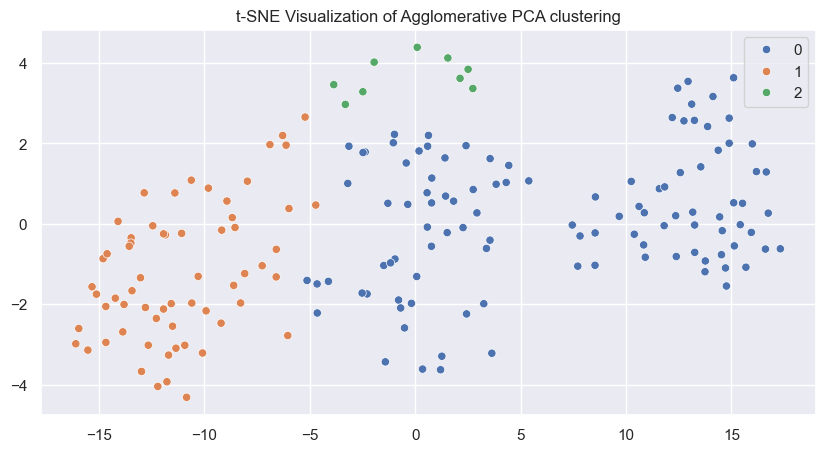

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data_tsne_pca_agglo = TSNE(n_components=2).fit_transform(data_agglo_pca.iloc[:,:-1])

sns.scatterplot(x=data_tsne_pca_agglo[:,0], y=data_tsne_pca_agglo[:,1], hue=agglo_pca, palette="deep")
plt.title('t-SNE Visualization of Agglomerative PCA clustering')
plt.show()

In [63]:
# Heirarchial Agglomerative Clustering - Original Dataset

In [64]:
# Identifying the hyperparameters
# Number of Clusters = 3

In [65]:
# making dendrogram

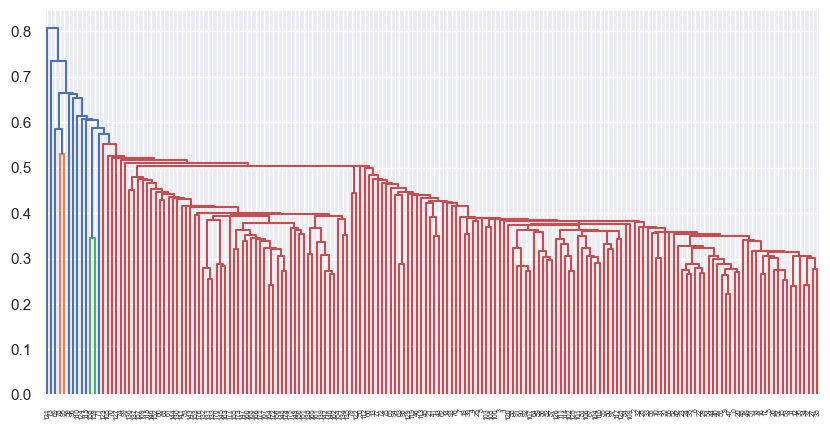

In [66]:
#dentogram linkage takes too much time to process. Not adivasable
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

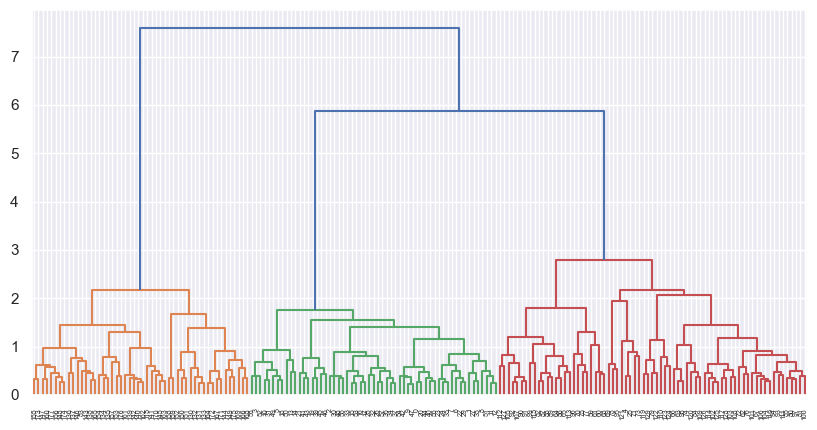

In [67]:
#dentogram linkage takes too much time to process. Not adivasable
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='ward'))

In [68]:
# Building Agglomerative clustering model

hc = AgglomerativeClustering(n_clusters=3,linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

In [69]:
# get clusters labels
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [70]:
data_agglo = dataset.iloc[:,1:].copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

clusters_agglo
0    73
1    62
2    43
Name: count, dtype: int64

In [71]:
# Model Evaluation & Visualisation

In [72]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_agglo,,,,,,,,,,,,,
0,12.280822,1.916301,2.227534,19.923288,94.739726,2.170274,1.926712,0.363562,1.570274,3.268082,1.025425,2.647671,526.616438
1,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
2,13.215349,3.537674,2.447674,21.558140,98.139535,1.700000,0.785349,0.462093,1.181163,7.508605,0.681628,1.742791,623.651163


In [73]:
#Visualising the data via dimensionality reduction

pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

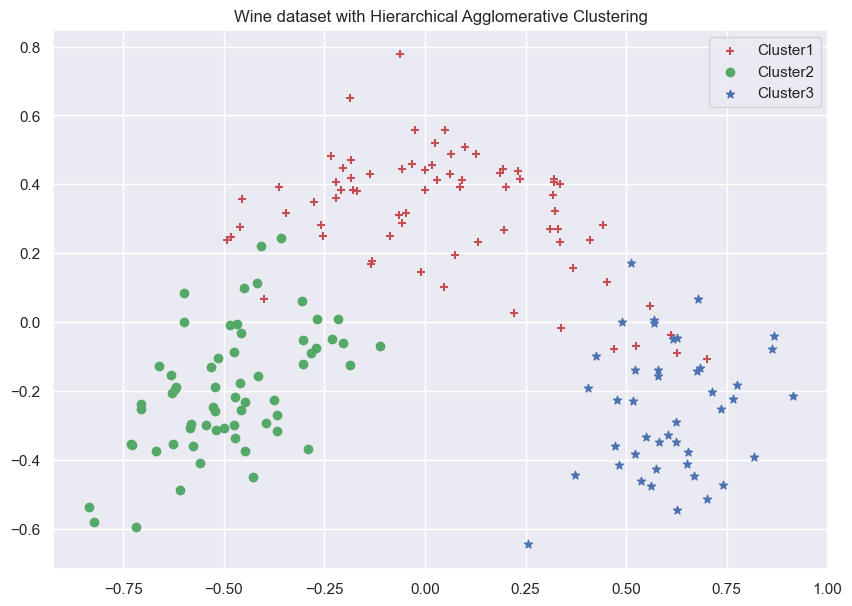

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = plt.scatter(pca_2d_agg[i,0], pca_2d_agg[i,1], c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = plt.scatter(pca_2d_agg[i,0], pca_2d_agg[i,1], c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = plt.scatter(pca_2d_agg[i,0], pca_2d_agg[i,1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
plt.title('Wine dataset with Hierarchical Agglomerative Clustering')
plt.show() 
